# MNIST dataset evaluation

In [20]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from som import KohonenNetwork, GaussianNeighboringFunc
import pickle

from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

In [21]:
# load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

Text(0.5, 1.0, 'Label: 5')

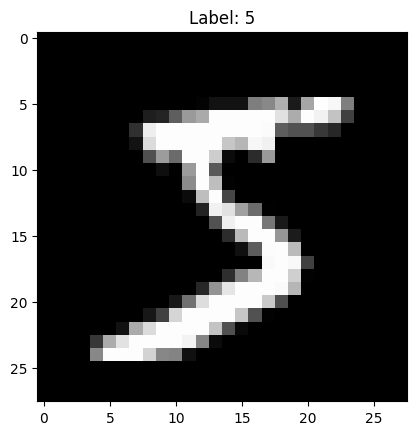

In [22]:
mnist_data = mnist.data
y = mnist.target.astype(int)


img = mnist_data.iloc[0]
plt.imshow(img.values.reshape(28, 28), cmap='gray')
plt.title(f'Label: {y[0]}')

In [23]:
mnist_data.values.shape

(70000, 784)

In [24]:
X = mnist_data.values
y = y.values

In [5]:
koh = KohonenNetwork(2, 5, vec_dim=28*28, neighboring_func=GaussianNeighboringFunc())
x = mnist_data.values[0]

koh.fit(mnist_data.values, epochs=5)

[array([2, 2, 5, ..., 3, 5, 2], dtype=int64),
 array([3, 4, 2, ..., 4, 2, 4], dtype=int64),
 array([4, 2, 4, ..., 6, 5, 5], dtype=int64),
 array([2, 4, 4, ..., 1, 5, 4], dtype=int64),
 array([3, 6, 2, ..., 2, 3, 4], dtype=int64)]

<Axes: >

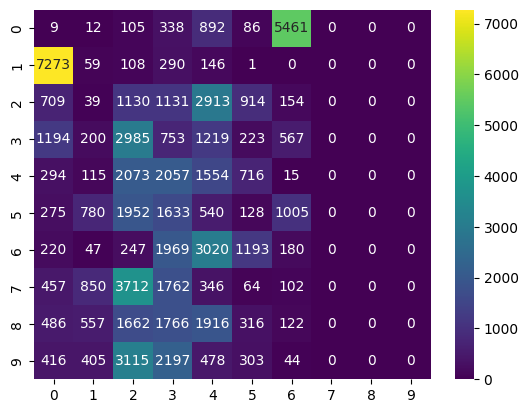

In [6]:
labels = koh.predict(mnist_data.values)
homogeneity_score(y, labels)

confusion_matrix(y, labels)
sns.heatmap(confusion_matrix(y, labels), cmap='viridis', annot=True, fmt='d')

In [7]:
print("Homogenity: ", homogeneity_score(y, labels))
print("Completeness: ", completeness_score(y, labels))
print("V-measure: ", v_measure_score(y, labels))
print("Adjusted Rand: ", adjusted_rand_score(y, labels))
print("Adjusted Mutual: ", adjusted_mutual_info_score(y, labels))

Homogenity:  0.2174750004750167
Completeness:  0.2759014331817504
V-measure:  0.24322874064958283
Adjusted Rand:  0.1688177826044459
Adjusted Mutual:  0.24308679981720005


In [22]:
labels = koh.predict(mnist_data.values, return_labels=False)


In [8]:
mapping = koh.get_mapping(mnist_data.values)

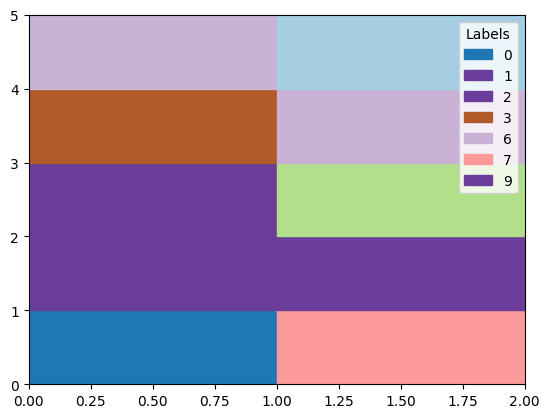

In [10]:
koh.plot_heatmap(mnist_data.values, y)


using 6 clusters I will train the network with default parameters to determine the network performance on different epochs. I will use the *Davies-Bouldin*, *homogenity* and *completness* and visuall assesement to do so.

In [16]:
koh = KohonenNetwork(10, 10, vec_dim=28*28, neighboring_func=GaussianNeighboringFunc())

koh.fit(mnist_data.values, epochs=10, verbose=True)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


[array([23, 21, 64, ..., 52, 36, 17], dtype=int64),
 array([47,  1, 65, ..., 72, 30, 19], dtype=int64),
 array([17, 70, 22, ..., 94, 75, 54], dtype=int64),
 array([27, 80, 64, ..., 76, 55, 60], dtype=int64),
 array([27, 80, 94, ..., 78, 55, 40], dtype=int64),
 array([25, 80, 94, ..., 67, 56, 61], dtype=int64),
 array([26, 80, 94, ..., 67, 46, 62], dtype=int64),
 array([27, 80, 84, ..., 67, 46, 61], dtype=int64),
 array([26, 80, 94, ..., 67, 46, 61], dtype=int64),
 array([26, 80, 94, ..., 66, 46, 62], dtype=int64)]

In [18]:
import pickle

with open('kohonen_mnist.pkl', 'wb') as f:
    pickle.dump(koh, f)

[0. 0.]
[0. 1.]
[0. 2.]
[0. 3.]
[0. 4.]
[0. 5.]
[0. 6.]
[0. 7.]
[0. 8.]
[0. 9.]
[1. 0.]
[1. 1.]
[1. 2.]
[1. 3.]
[1. 4.]
[1. 5.]
[1. 6.]
[1. 7.]
[1. 8.]
[1. 9.]
[2. 0.]
[2. 1.]
[2. 2.]
[2. 3.]
[2. 4.]
[2. 5.]
[2. 6.]
[2. 7.]
[2. 8.]
[2. 9.]
[3. 0.]
[3. 1.]
[3. 2.]
[3. 3.]
[3. 4.]
[3. 5.]
[3. 6.]
[3. 7.]
[3. 8.]
[3. 9.]
[4. 0.]
[4. 1.]
[4. 2.]
[4. 3.]
[4. 4.]
[4. 5.]
[4. 6.]
[4. 7.]
[4. 8.]
[4. 9.]
[5. 0.]
[5. 1.]
[5. 2.]
[5. 3.]
[5. 4.]
[5. 5.]
[5. 6.]
[5. 7.]
[5. 8.]
[5. 9.]
[6. 0.]
[6. 1.]
[6. 2.]
[6. 3.]
[6. 4.]
[6. 5.]
[6. 6.]
[6. 7.]
[6. 8.]
[6. 9.]
[7. 0.]
[7. 1.]
[7. 2.]
[7. 3.]
[7. 4.]
[7. 5.]
[7. 6.]
[7. 7.]
[7. 8.]
[7. 9.]
[8. 0.]
[8. 1.]
[8. 2.]
[8. 3.]
[8. 4.]
[8. 5.]
[8. 6.]
[8. 7.]
[8. 8.]
[8. 9.]
[9. 0.]
[9. 1.]
[9. 2.]
[9. 3.]
[9. 4.]
[9. 5.]
[9. 6.]
[9. 7.]
[9. 8.]
[9. 9.]


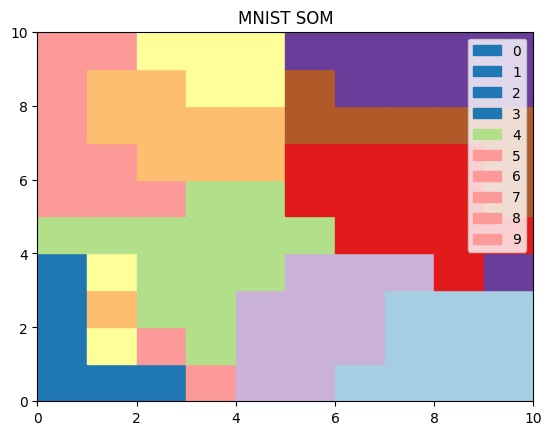

<Figure size 640x480 with 0 Axes>

In [21]:


plt.title('MNIST SOM')
koh.plot_heatmap(mnist_data.values, y)


plt.savefig('plots/mnist_som.png')

## Cluster evaluation

In [25]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

def cross_val_kmeans(X, y, cv=5, M=10, N=10, mapping=True, grid = "rectangular", verbose=False, idx_path = None, save_path=None):
    # train test split
    idx = np.load(idx_path)
    
    scores = { 'homogeneity': [], 'completeness': [], 'v_measure': []}
    for i in range(cv):
        print(f"Fold {i+1}/{cv}")
        # train test split
        if mapping:
            with open(f"{save_path}_{i}.pkl", 'rb') as f:
                koh = pickle.load(f)
                
            embedding = koh.get_mapping(X)
        else:
            embedding = X
             

        X_train = embedding[idx != i]
        y_train = y[idx != i]
        X_test = embedding[idx == i]
        y_test = y[idx == i]
        
        kmeans = KMeans(n_clusters=np.unique(y).shape[0])
        kmeans.fit(X_train)
        
        y_pred = kmeans.predict(X_test)
        
        scores['homogeneity'].append(homogeneity_score(y_test, y_pred))
        scores['completeness'].append(completeness_score(y_test, y_pred))
        scores['v_measure'].append(v_measure_score(y_test, y_pred))
    
    return scores

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0.5, 0.98, 'KMeans clustering on mnist dataset')

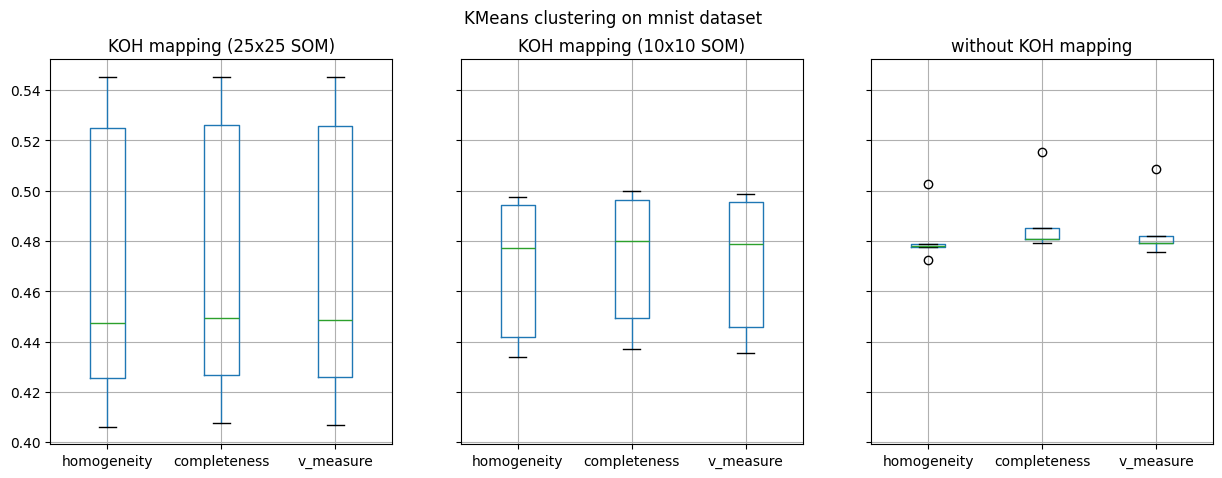

In [9]:

fig , ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net25x25/mnist_som_rect_idx.npy', save_path='som_snapshots/net25x25/rect/mnist_som')

scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[0])
ax[0].set_title('KOH mapping (25x25 SOM)')


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/rect/mnist_som')


scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[1])
ax[1].set_title('KOH mapping (10x10 SOM)')



scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/mnist_som', mapping=False)
scores = pd.DataFrame(scores)

ax[2].set_title('without KOH mapping')

scores.boxplot(ax=ax[2])

fig.suptitle("KMeans clustering on mnist dataset")

In [26]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

def cross_val_rf(X, y, cv=5, M=10, N=10, mapping=True, grid = "rectangular", verbose=False, idx_path = None, save_path=None, pca=False):
    # train test split
    idx = np.load(idx_path)
    
    scores = { 'accuracy': []}
    for i in range(cv):
        print(f"Fold {i+1}/{cv}")
        # train test split
        if pca:
            print("Fitting PCA...")
            pca = PCA(n_components=2)
            pca.fit(X[idx != i])
            embedding = pca.transform(X)          
            
        
        elif mapping:
            with open(f"{save_path}_{i}.pkl", 'rb') as f:
                koh = pickle.load(f)
                
            embedding = koh.get_mapping(X)
        else:
            embedding = X
             

        X_train = embedding[idx != i]
        y_train = y[idx != i]
        X_test = embedding[idx == i]
        y_test = y[idx == i]
        
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train.ravel())
        
        scores['accuracy'].append(rf.score(X_test, y_test))
    
    return scores

In [ ]:

scores_25 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net25x25/mnist_som_rect_idx.npy', save_path='som_snapshots/net25x25/rect/mnist_som')

scores_10 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/rect/mnist_som')


scores_none = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/mnist_som', mapping=False)
scores = pd.DataFrame(scores)


In [18]:

scores_pca = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/mnist_som', pca = True)

scores_25 = pd.DataFrame(scores_25)
scores_10 = pd.DataFrame(scores_10)
scores_none = pd.DataFrame(scores_none)
scores_pca = pd.DataFrame(scores_pca)

Fold 1/5
Fitting PCA...
Fold 2/5
Fitting PCA...
Fold 3/5
Fitting PCA...
Fold 4/5
Fitting PCA...
Fold 5/5
Fitting PCA...


Text(0.5, 1.0, 'Random Forest on MNIST dataset with and without KOH mapping')

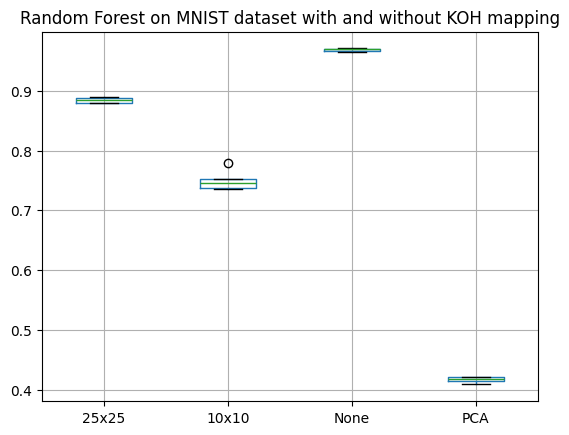

In [19]:
scores = pd.concat([scores_25, scores_10, scores_none, scores_pca], axis=1)
scores.columns = ['25x25', '10x10', 'None', "PCA"]
scores.boxplot()
plt.title("Random Forest on MNIST dataset with and without KOH mapping")

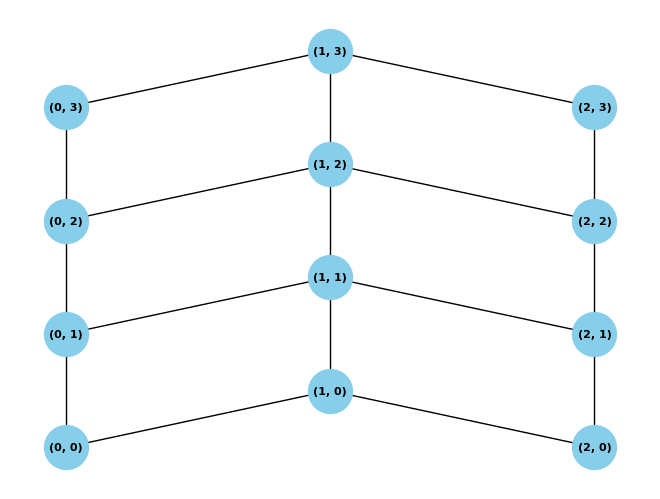

In [4]:
koh = KohonenNetwork(3, 4, vec_dim=28*28, neighboring_func=GaussianNeighboringFunc(), grid="hexagonal")


import networkx as nx

G = koh._initial_graph
pos = koh._pos
nx.draw(G, pos=pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')

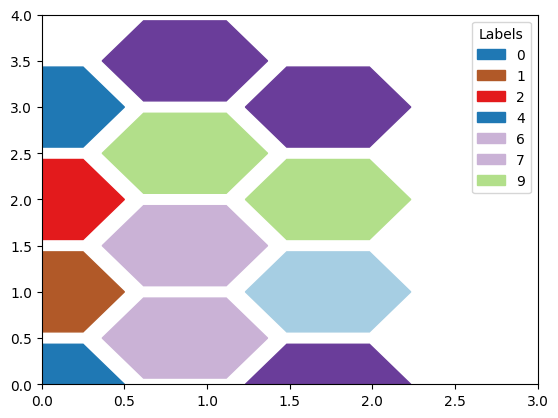

In [5]:
koh.plot_heatmap(mnist_data.values, y)

C:\Users\tymot\AppData\Local\Temp\ipykernel_42928\4206946281.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colours = plt.cm.get_cmap("Paired", 5)


(-1.0, 4.0)

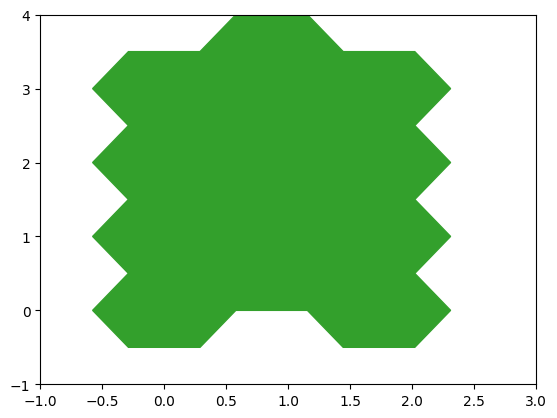

In [6]:
from matplotlib.patches import RegularPolygon
patches = []
colours = plt.cm.get_cmap("Paired", 5)


for i in range(koh.M):
            for j in range(koh.N):
                x, y = koh._pos[i, j]
                
                if koh.grid == "hexagonal":
                    patch = RegularPolygon((x, y), numVertices=6, radius=0.5 * 2 / np.sqrt(3), orientation=np.pi/6, fill=True, color=colours(1))
                
                patches.append(patch)

for patch in patches:
    plt.gca().add_patch(patch)
    

plt.xlim([-1, koh.M])
plt.ylim([-1, koh.N])

In [12]:
pos

array([[[0.        , 0.        ],
        [0.        , 1.        ],
        [0.        , 2.        ],
        [0.        , 3.        ]],

       [[0.8660254 , 0.8660254 ],
        [0.8660254 , 1.8660254 ],
        [0.8660254 , 2.8660254 ],
        [0.8660254 , 3.8660254 ]],

       [[1.73205081, 0.        ],
        [1.73205081, 1.        ],
        [1.73205081, 2.        ],
        [1.73205081, 3.        ]]])

## Different neighbouring func

Fold 1/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 2/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Fold 3/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Fold 4/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 5/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0.5, 0.98, 'KMeans clustering on MNIST dataset')

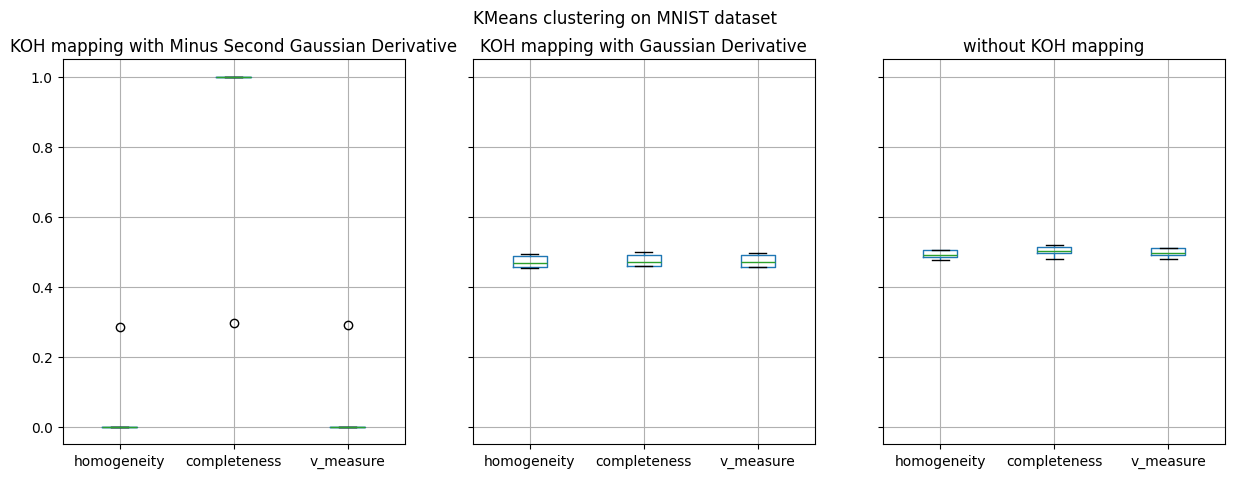

In [27]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_minusone_rect_idx.npy', save_path='som_snapshots/net10x10/mnist_som_minusone')

scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[0])
ax[0].set_title('KOH mapping with Minus Second Gaussian Derivative')


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/rect/mnist_som')


scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[1])
ax[1].set_title('KOH mapping with Gaussian Derivative')



scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som', mapping=False)
scores = pd.DataFrame(scores)

ax[2].set_title('without KOH mapping')

scores.boxplot(ax=ax[2])

fig.suptitle("KMeans clustering on MNIST dataset")

In [28]:
scores_minus = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_minusone_rect_idx.npy', save_path='som_snapshots/net10x10/mnist_som_minusone')

scores_minus = pd.DataFrame(scores_minus)


scores_gauss = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/rect/mnist_som')


scores_gauss = pd.DataFrame(scores_gauss)

scores = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/rect/mnist_som', mapping=False)
scores = pd.DataFrame(scores)

scores = pd.concat([scores_minus, scores_gauss, scores], axis=1)
scores.columns = ['Minus Second Gaussian Derivative', 'Gaussian Derivative', 'None']


Fold 1/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 2/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Fold 3/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Fold 4/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Fold 5/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0, 0.5, 'Accuracy')

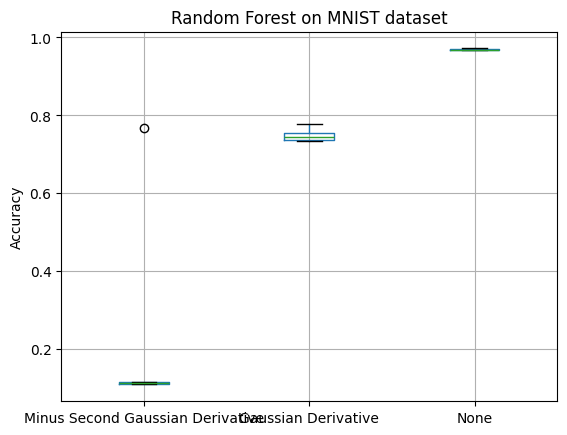

In [29]:
scores.boxplot()
plt.title("Random Forest on MNIST dataset")
plt.ylabel("Accuracy")

## Different grid

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0.5, 0.98, 'KMeans clustering on MNIST dataset with different grid shapes')

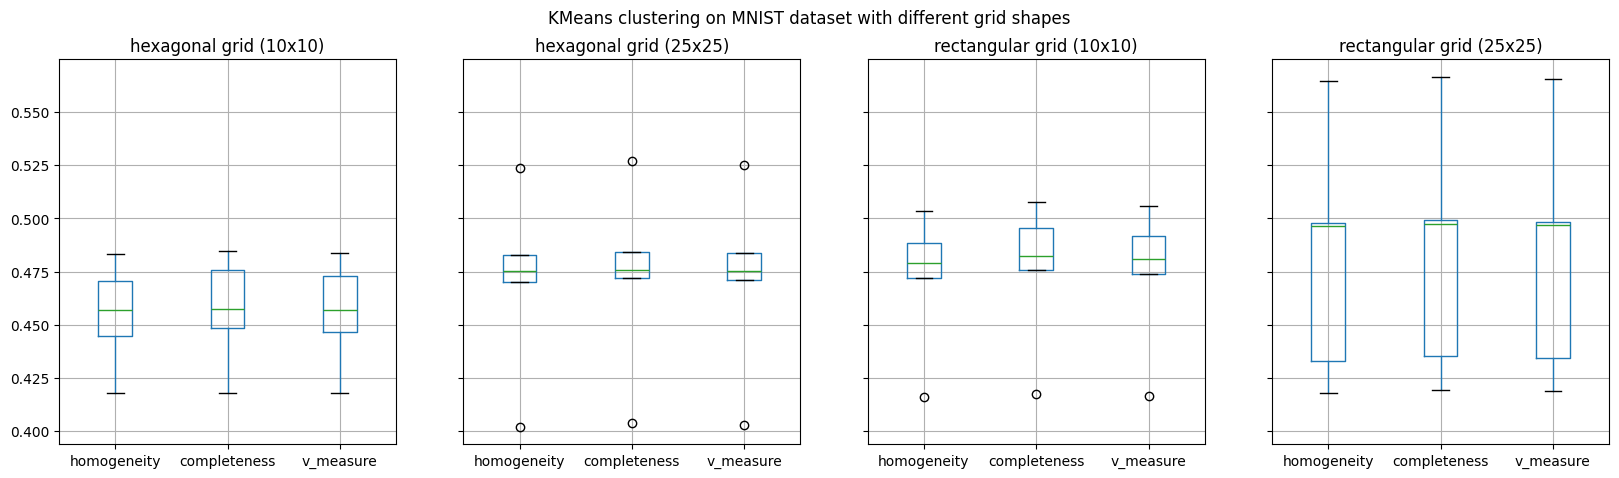

In [31]:

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

scores_10 = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/hex/mnist_som')

scores_10 = pd.DataFrame(scores_10)
scores_10.boxplot(ax=ax[0])
ax[0].set_title('hexagonal grid (10x10)')


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net25x25/mnist_som_rect_idx.npy', save_path='som_snapshots/net25x25/hex/mnist_som')


scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[1])
ax[1].set_title('hexagonal grid (25x25)')



scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/rect/mnist_som')
scores = pd.DataFrame(scores)

ax[2].set_title('rectangular grid (10x10)')

scores.boxplot(ax=ax[2])


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net25x25/mnist_som_rect_idx.npy', save_path='som_snapshots/net25x25/rect/mnist_som')
scores = pd.DataFrame(scores)

ax[3].set_title('rectangular grid (25x25)')

scores.boxplot(ax=ax[3])

fig.suptitle("KMeans clustering on MNIST dataset with different grid shapes")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0, 0.5, 'Accuracy')

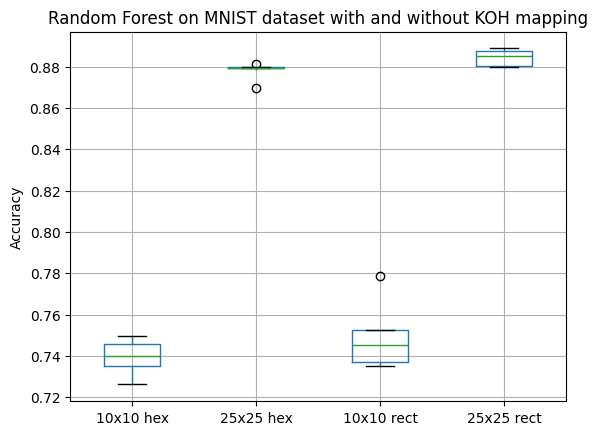

In [35]:

scores_10 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/hex/mnist_som')

scores_10 = pd.DataFrame(scores_10)


scores_25 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net25x25/mnist_som_rect_idx.npy', save_path='som_snapshots/net25x25/hex/mnist_som')

scores_25 = pd.DataFrame(scores_25)



scores_rect_10 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/mnist_som_rect_idx.npy', save_path='som_snapshots/net10x10/rect/mnist_som')
scores_rect_10 = pd.DataFrame(scores_rect_10)


scores_rect_25 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net25x25/mnist_som_rect_idx.npy', save_path='som_snapshots/net25x25/rect/mnist_som')
scores_rect_25 = pd.DataFrame(scores_rect_25)

scores = pd.concat([scores_10, scores_25, scores_rect_10, scores_rect_25], axis=1)
scores.columns = ['10x10 hex', '25x25 hex', '10x10 rect', '25x25 rect']

scores.boxplot()
plt.title("Random Forest on MNIST dataset with and without KOH mapping")
plt.ylabel("Accuracy")